In [43]:
import numpy as np

NumPy is a Python library used for working with arrays

In [44]:
import pandas as pd

As an open-source software library built on top of Python specifically for data manipulation and analysis

In [45]:
!pip install scikit-learn

What Can We Achieve Using Python Scikit-Learn?

Classification. Identifying which category an object belongs to.
Application: Spam detection.

Regression. Predicting a continuous variable based on relevant independent variables.

Clustering. Automatic grouping of similar objects into different clusters.

In [46]:
from sklearn import preprocessing

In [47]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
import matplotlib.pyplot as plt

In [51]:
from sklearn.pipeline import Pipeline

In [52]:
import tensorflow as tf

TensorFlow can be used to develop models for various tasks, including natural language processing, image recognition, handwriting recognition, and different computational-based simulations such as partial differential equations.

In [53]:
import keras

Keras is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. It also supports multiple backend neural network computation

In [54]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical

One of Keras's most commonly used layers is the Dense layer, which creates fully connected neural networks.



In [55]:
import seaborn as sns
from sklearn.compose import ColumnTransformer
from statistics import stdev
from keras import regularizers

In [56]:
df_data=pd.read_csv("/content/lithium-ion batteries.csv")

In [57]:
df_data.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [58]:
data_temp=df_data

In [79]:
data_temp=data_temp.drop(["Materials Id"],axis=1)

In [83]:
data_temp

,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...,...,...
334,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


In [80]:
numerical_transformer=StandardScaler()
label_transformer=OrdinalEncoder()

StandardScaler removes the mean and scales each feature/variable to unit variance.

Ordinal encoding is a technique to transform categorical features into a numerical format. In ordinal encoding, labels are translated to numbers based on their ordinal relationship to one another.

In [81]:
n_cols=[c for c in data_temp.columns if data_temp[c].dtype in ['int64', 'float64', 'int32', 'float32']]

In [82]:
obj_cols=[c for c in data_temp.columns if data_temp[c].dtype in ['object', 'bool']]

In [84]:
print(n_cols,obj_cols)

['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume'] ['Formula', 'Spacegroup', 'Has Bandstructure', 'Crystal System']


In [85]:
ct = ColumnTransformer([('num', numerical_transformer, n_cols), ('non_num', label_transformer, obj_cols),])
processed = ct.fit_transform(data_temp)
new_data = pd.DataFrame(columns=data_temp.columns, data=processed)
new_data.head()

,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,-0.447048,-1.722253,1.272374,-0.988690,0.025455,-0.989769,54.0,31.0,1.0,0.0
1,-0.430703,-1.656286,0.735721,-0.296020,-0.164107,-0.350714,54.0,21.0,1.0,0.0
2,-0.861132,-1.524351,1.448190,-0.469187,-0.630939,-0.567989,81.0,6.0,1.0,0.0
3,-0.904720,-1.491367,0.860909,-0.036268,-0.215034,-0.108070,79.0,1.0,1.0,0.0
4,-0.708575,-1.392416,0.458650,-0.122852,0.990242,-0.159045,48.0,1.0,1.0,0.0


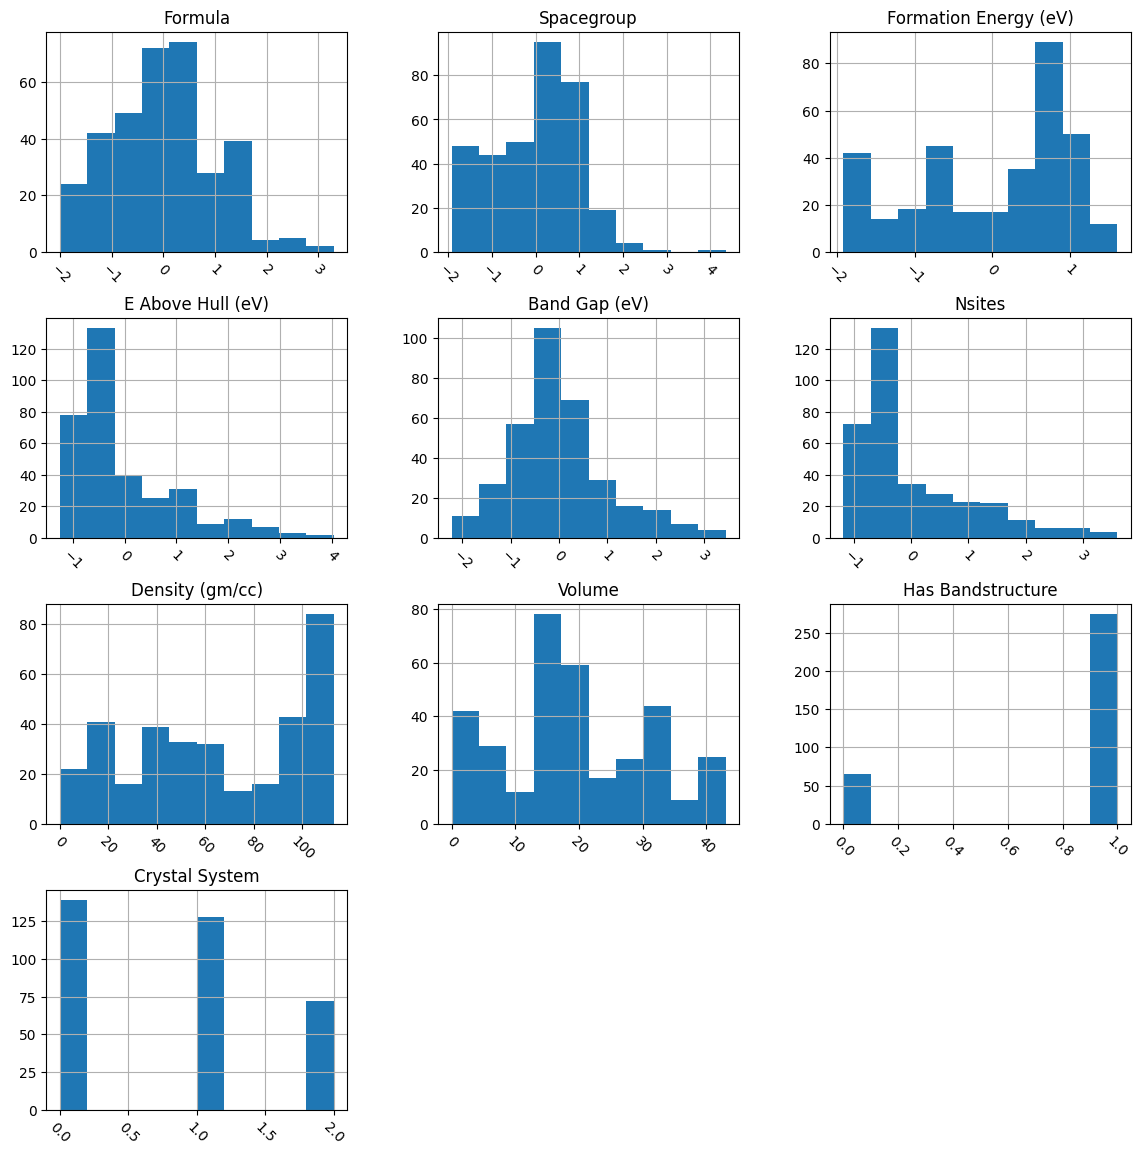

In [86]:
new_data.hist(figsize=(14,14), xrot=-45)
plt.show()

In [87]:
X = new_data.drop('Crystal System', axis=1)
y = new_data['Crystal System']
print(X.shape)
print(y.shape)

(339, 9)
(339,)


<Axes: >

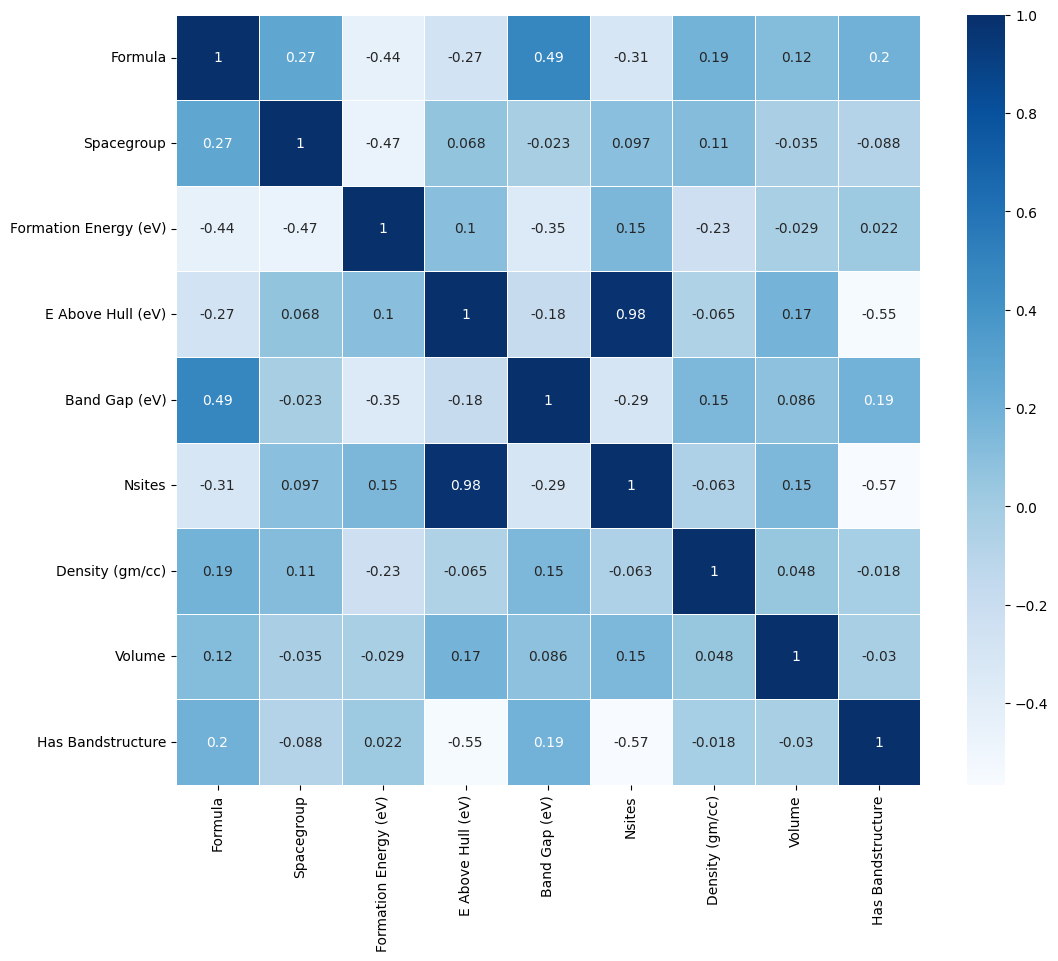

In [88]:
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, lw=0.5, cmap='Blues', annot=True)

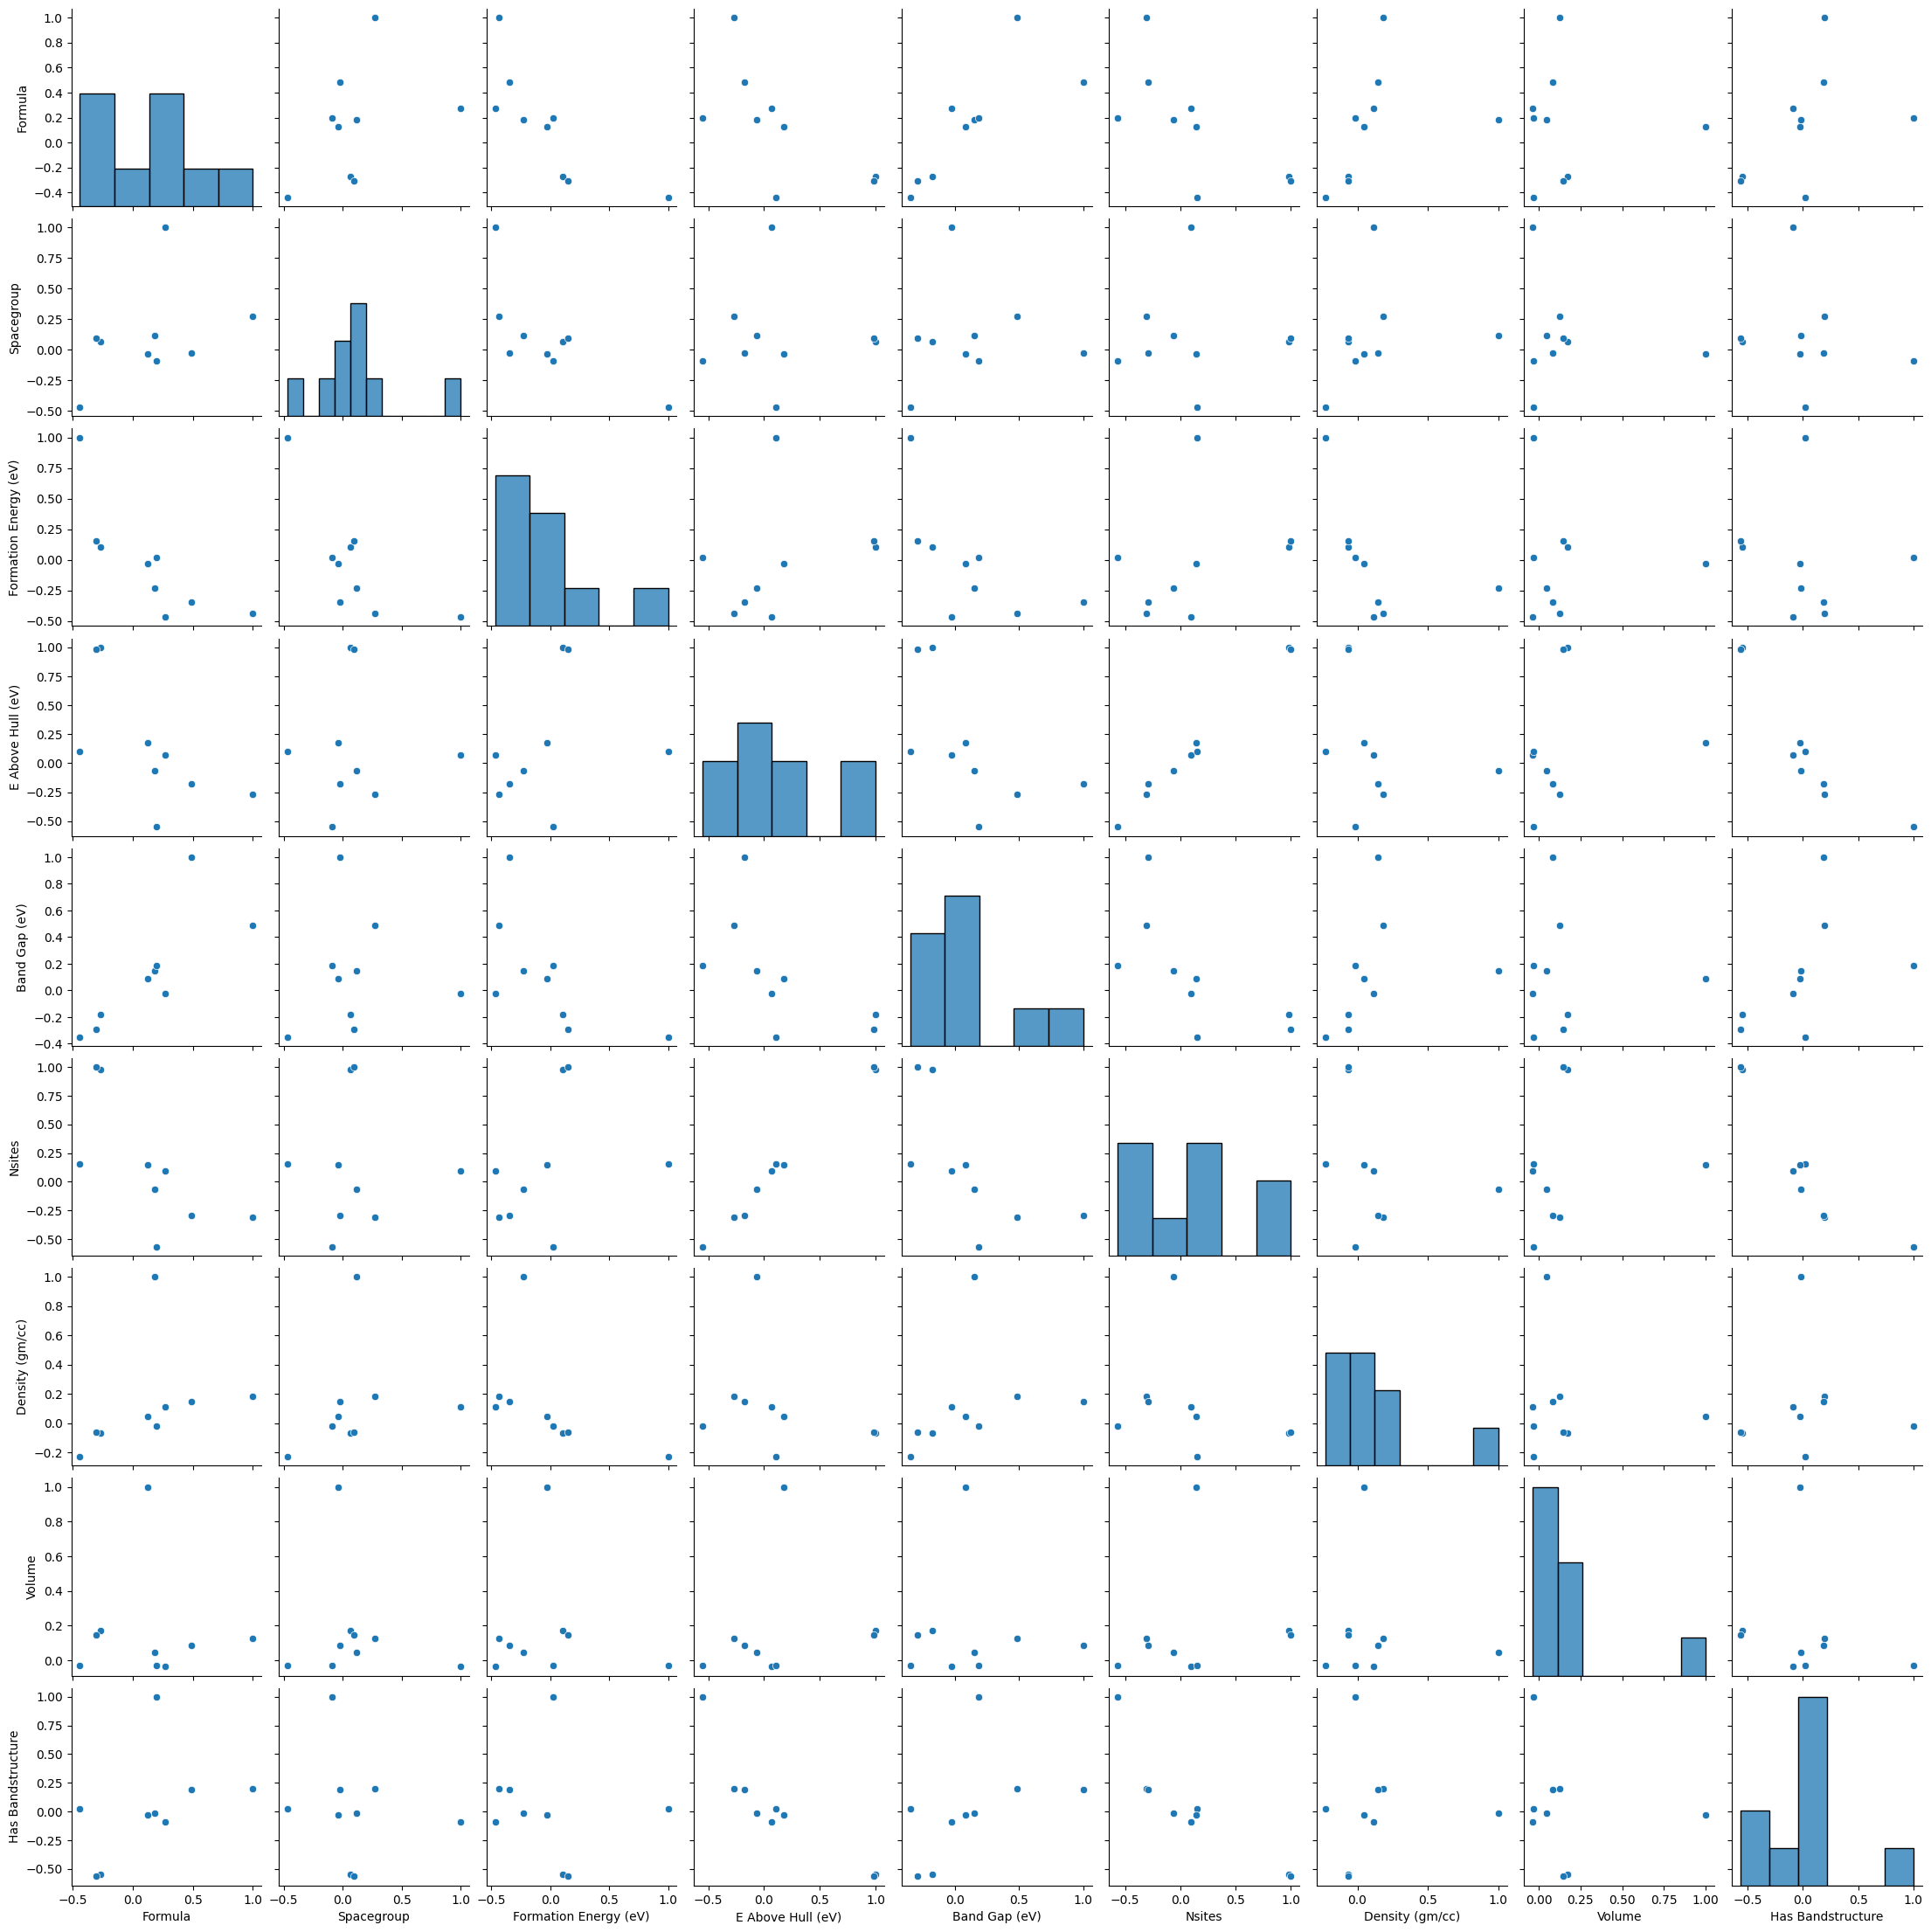

In [89]:
corr_matrix = X.corr()
sns.pairplot(corr_matrix)

In [95]:
def train_model(n_runs, t_size=0.25):
    score = []
    for j in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=t_size, shuffle=True)
        y_encoded = to_categorical(y_train)
        model = Sequential()
        model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='softsign', kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dropout(0.2))
        model.add(Dense(3, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        global history
        history = model.fit(X_train, y_encoded, epochs=100, verbose=False, validation_split=0.2)

        #preds=model.predict_class(X_test)
        predict_x=model.predict(X_test)
        classes_x=np.argmax(predict_x,axis=1)

        score.append(accuracy_score(y_test, classes_x))
    print(f'Average score: '+ str(sum(score)/len(score)))
    print(f'Standard deviation: ' + str(stdev(score)))

    plt.title('Accuracy over ' + str(n_runs) + ' runs')
    plt.plot(score, label='Accuracy Score')
    plt.ylabel('Accuracy %')
    plt.xlabel('Runs')
    plt.legend()
    plt.show()

4/4 [==============================] - 0s 5ms/step
Average score: 0.7274509803921569
Standard deviation: 0.08921029934178296


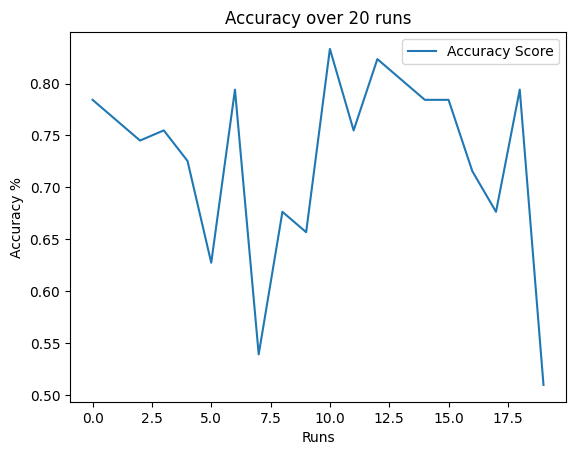

In [96]:
train_model(20,0.3)

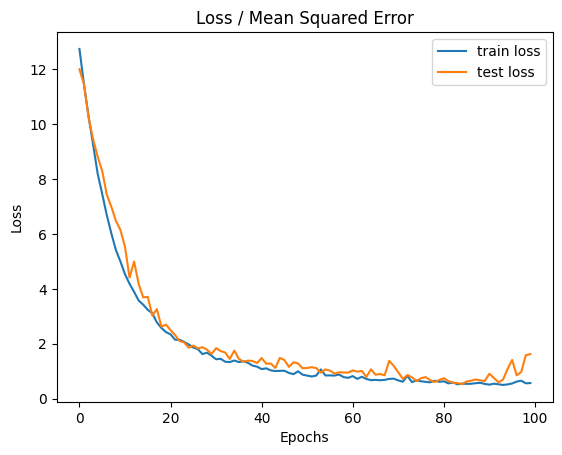

In [97]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

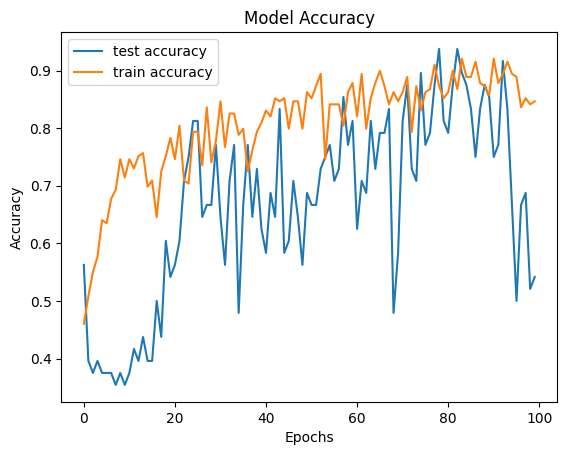

In [98]:
plt.title('Model Accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()